In [3]:
# Paso 0: Importar librerias necesarias

import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import pylab as plt
from pandas.plotting import lag_plot


In [4]:
# Paso 1: Importar el DF de todas las empresas del IBEX 35

df = pd.read_csv('ibex35.csv')

df.head()

,id,ticker,empresa,date,open,high,low,close,adj close,volume
0,1,ANA,Acciona,2019-01-02,73.900002,73.900002,73.900002,73.900002,64.148270,0
1,1,ANA,Acciona,2022-06-24,174.199997,178.800003,174.000000,178.800003,169.562302,0
2,1,ANA,Acciona,2022-06-23,169.899994,173.199997,169.000000,173.000000,164.061951,0
3,1,ANA,Acciona,2022-06-22,171.399994,171.399994,168.800003,170.199997,161.406616,0
4,1,ANA,Acciona,2022-06-21,179.699997,179.699997,172.300003,173.600006,164.630966,0


In [5]:
# Paso 2: Filtrar por la empresa sobre la que realizar el modelo

enegas = df[df['empresa'] == 'Enagas']

enegas.shape

(1325, 10)

In [6]:
# Paso 3: Seleccionar las columnas definitivas que utilizaremos

enegas = enegas [['date','open','high','low','close','adj close']]

enegas.shape

(1325, 6)

In [7]:
# Paso 4: Modificar el formato de columna 'date' (format: object ===> datatime)

enegas['date'] = pd.to_datetime(enegas['date'], format="%Y-%m-%d")

enegas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1325 entries, 16575 to 17899
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1325 non-null   datetime64[ns]
 1   open       1325 non-null   float64       
 2   high       1325 non-null   float64       
 3   low        1325 non-null   float64       
 4   close      1325 non-null   float64       
 5   adj close  1325 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 72.5 KB


In [8]:
# Paso 5: Ordenar el DF por fecha

enegas.sort_values(by='date',ascending= True, inplace=True)

enegas.head()

,date,open,high,low,close,adj close
17733,2019-01-02,23.440001,24.100000,23.240000,24.030001,16.366409
16575,2019-01-03,23.959999,24.469999,23.900000,24.330000,16.570734
17010,2019-01-04,24.459999,24.530001,24.280001,24.379999,16.604788
17011,2019-01-07,24.360001,24.500000,24.160000,24.360001,16.591169
17012,2019-01-08,24.350000,24.709999,24.350000,24.700001,16.822737


In [9]:
# Paso 6: Filtrar nuevamente para eliminar efecto COVID del análisis (previo a 2021)

# Filtro:

fecha_inicio = '2021-01-01'
fecha_fin = '2024-03-01'

acciona = enegas[(enegas['date'] >= fecha_inicio) & (enegas['date'] <= fecha_fin)]

# Comprobar si se ha aplicado correctamente

enegas.shape

(1325, 6)

In [10]:
# Paso 7: Añadir al DF fechas obviadas por mercado de valores español (fin de semana y festivos)

# Rango de fechas desde '2021-01-01' a '2024-03-01'

date_range = pd.date_range(start=enegas['date'].min(), end=enegas['date'].max(), freq='D')

# Reindexa el DF con el nuevo rango de fechas

enegas = enegas.set_index('date').reindex(date_range).reset_index()

# Volver a modificar el nombre de columna 'date'

enegas = enegas.rename(columns={'index': 'date'})


In [11]:
# Paso 8: Comprobar que ha introducido la fechas ausentes en el DF original

enegas.head(10)

,date,open,high,low,close,adj close
0,2019-01-02,23.440001,24.100000,23.240000,24.030001,16.366409
1,2019-01-03,23.959999,24.469999,23.900000,24.330000,16.570734
2,2019-01-04,24.459999,24.530001,24.280001,24.379999,16.604788
3,2019-01-05,NaN,NaN,NaN,NaN,NaN
4,2019-01-06,NaN,NaN,NaN,NaN,NaN
5,2019-01-07,24.360001,24.500000,24.160000,24.360001,16.591169
6,2019-01-08,24.350000,24.709999,24.350000,24.700001,16.822737
7,2019-01-09,24.750000,24.830000,24.440001,24.590000,16.747814
8,2019-01-10,24.540001,24.990000,24.540001,24.990000,17.020247
9,2019-01-11,24.940001,25.280001,24.770000,24.950001,16.993006


In [12]:
# Paso 9: Rellenar valores nulos con el anterior valor de la columna(viernes o previo a festivo)

enegas = enegas.fillna(method='ffill')

In [13]:
# Paso 10: Comprobar que se han introducido los valores correctamente


enegas.head(10)

,date,open,high,low,close,adj close
0,2019-01-02,23.440001,24.100000,23.240000,24.030001,16.366409
1,2019-01-03,23.959999,24.469999,23.900000,24.330000,16.570734
2,2019-01-04,24.459999,24.530001,24.280001,24.379999,16.604788
3,2019-01-05,24.459999,24.530001,24.280001,24.379999,16.604788
4,2019-01-06,24.459999,24.530001,24.280001,24.379999,16.604788
5,2019-01-07,24.360001,24.500000,24.160000,24.360001,16.591169
6,2019-01-08,24.350000,24.709999,24.350000,24.700001,16.822737
7,2019-01-09,24.750000,24.830000,24.440001,24.590000,16.747814
8,2019-01-10,24.540001,24.990000,24.540001,24.990000,17.020247
9,2019-01-11,24.940001,25.280001,24.770000,24.950001,16.993006


In [14]:
# Paso 11: Establecer columna 'date' como índice para modelo

enegas = enegas.set_index('date')

enegas.head(10)

,open,high,low,close,adj close
date,,,,,
2019-01-02,23.440001,24.100000,23.240000,24.030001,16.366409
2019-01-03,23.959999,24.469999,23.900000,24.330000,16.570734
2019-01-04,24.459999,24.530001,24.280001,24.379999,16.604788
2019-01-05,24.459999,24.530001,24.280001,24.379999,16.604788
2019-01-06,24.459999,24.530001,24.280001,24.379999,16.604788
2019-01-07,24.360001,24.500000,24.160000,24.360001,16.591169
2019-01-08,24.350000,24.709999,24.350000,24.700001,16.822737
2019-01-09,24.750000,24.830000,24.440001,24.590000,16.747814
2019-01-10,24.540001,24.990000,24.540001,24.990000,17.020247


In [15]:
# Paso 12: Establecer siguiente criterio para que el modelo AR funcione

enegas.index = pd.DatetimeIndex(enegas.index).to_period('d')

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

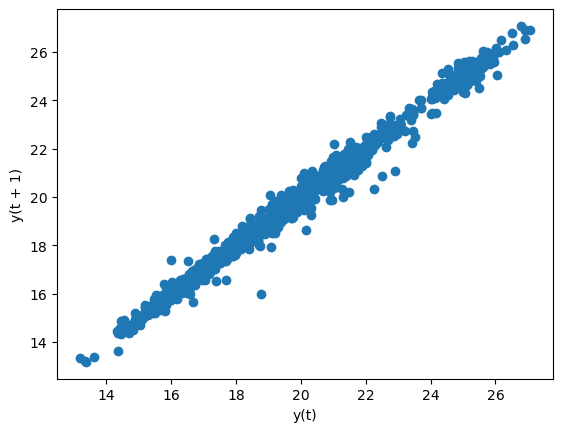

In [16]:
# Paso 13: Comprobar linealidad de la variable y = 'close'

lag_plot(enegas.close)

In [17]:
# Paso 14: Importar modelo de AR

from statsmodels.tsa.ar_model import AutoReg as AR

In [18]:
# Paso 15: Realizar el split en el DF del train y el test

train, test = enegas.close[:-10], enegas.close[-10:]

train.shape, test.shape

((1876,), (10,))

In [19]:
# Paso 16: Entrenar el modelo de AR

modelo = AR(train, lags=1).fit()

In [20]:
# Paso 17: Realizar predicción con el entrenamiento

pred = modelo.predict(len(train), len(enegas.close)-1)

# Check sobre los valores de la predicción

pred

2024-02-21    14.938781
2024-02-22    14.952507
2024-02-23    14.966178
2024-02-24    14.979796
2024-02-25    14.993359
2024-02-26    15.006868
2024-02-27    15.020323
2024-02-28    15.033725
2024-02-29    15.047074
2024-03-01    15.060369
Freq: D, dtype: float64

In [21]:
# Paso 18: Chequear coincidencia entre test y pred

test

date
2024-02-21    15.030
2024-02-22    14.680
2024-02-23    14.365
2024-02-24    14.365
2024-02-25    14.365
2024-02-26    13.620
2024-02-27    13.360
2024-02-28    13.170
2024-02-29    13.345
2024-03-01    13.205
Freq: D, Name: close, dtype: float64

In [22]:
# Paso 19: Calcular el error de la predicción sobre la realidad

error = (pred - test).abs().sum()/len(pred)  

error

1.0676416574157133

In [23]:
# Paso 20: Generar un DF sobre la comparativa en realidad, predicción y error

res=pd.DataFrame({'real': test, 'pred': pred, 'error': pred - test})

res

,real,pred,error
2024-02-21,15.030,14.938781,-0.091219
2024-02-22,14.680,14.952507,0.272507
2024-02-23,14.365,14.966178,0.601178
2024-02-24,14.365,14.979796,0.614796
2024-02-25,14.365,14.993359,0.628359
2024-02-26,13.620,15.006868,1.386868
2024-02-27,13.360,15.020323,1.660323
2024-02-28,13.170,15.033725,1.863725
2024-02-29,13.345,15.047074,1.702074
2024-03-01,13.205,15.060369,1.855369
